<a href="https://colab.research.google.com/github/deyaliao/surestart2021/blob/main/speech_emotion_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REFERENCE: taken from https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer --> introduction to affective computing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Emotion_Voice_Detection_Model.h5 to Emotion_Voice_Detection_Model.h5


In [2]:
from keras.models import load_model
model = load_model('Emotion_Voice_Detection_Model.h5')


In [3]:
# my audio
from google.colab import files
uploaded = files.upload()

Saving testfile.wav to testfile.wav


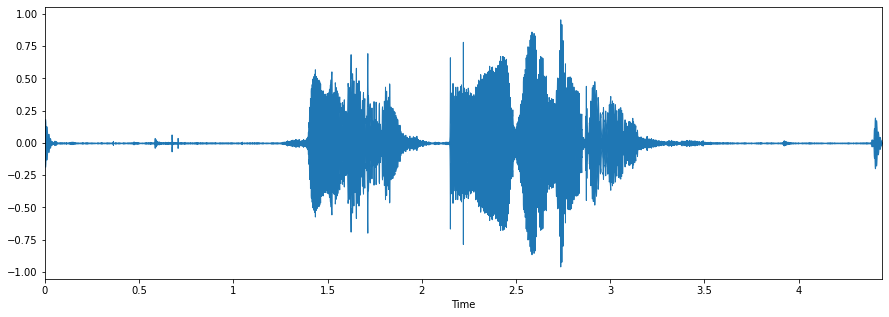

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# test my audio!
data, sampling_rate = librosa.load('testfile.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)


In [15]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('testfile.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs



In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)           8

In [17]:
featurelive = np.atleast_2d(featurelive)
featurelive = np.expand_dims(featurelive,axis=2)
test_predict = model.predict(featurelive)

print(np.argmax(test_predict,axis=1))


[7]


analysis: i am not a male, nor do i sound fearful in the audio clip. therefore, i do not think this is entirely accurate

0 - female_angry
1 - female_calm
2 - female_fearful
3 - female_happy
4 - female_sad
5 - male_angry
6 - male_calm
7 - male_fearful
8 - male_happy
9 - male_sad

